In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
IMG_SIZE=28
batch_size=200

In [4]:
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [5]:
train_gen = ImageDataGenerator(
                               rotation_range=15,
                               width_shift_range=0.2,
#                                shear_range=0.3,
                               height_shift_range=0.1,
#                                zoom_range=[2.5, 0.75])
#                                 zoom_range=[2, 0.7])
#                                zoom_range=[1.3, 0.6])
#                                zoom_range=-2)
                               zoom_range=0.1
                              )

training_set = train_gen.flow(x_train,y_train,batch_size=batch_size,shuffle=False)

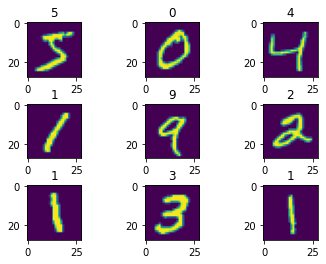

In [6]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.imshow(x_train[i])
    plt.title(np.argmax(y_train[i]))
#     plt.axis('off')

In [7]:
def demo(training_set):
    plt.figure(figsize=(3,4))
    plt.imshow(x_train[7])
    plt.figure(figsize=(10,10))
    for i in range(9):
    #     img, lab = training_set.next()
        img, lab = training_set[0]
        plt.subplot(3,3,i+1)
#         plt.subplots_adjust(hspace=0.5)
#         plt.imshow(img[i])
        plt.imshow(img[7])
#         plt.title(np.argmax(lab[0]))
    #     plt.axis('off')

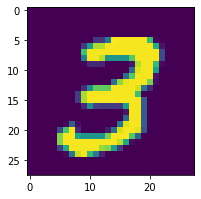

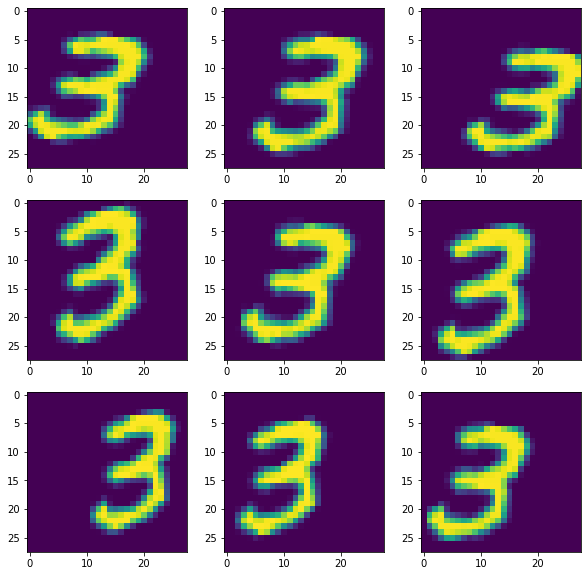

In [8]:
demo(training_set)

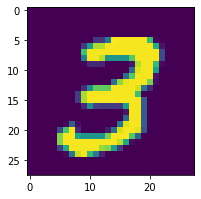

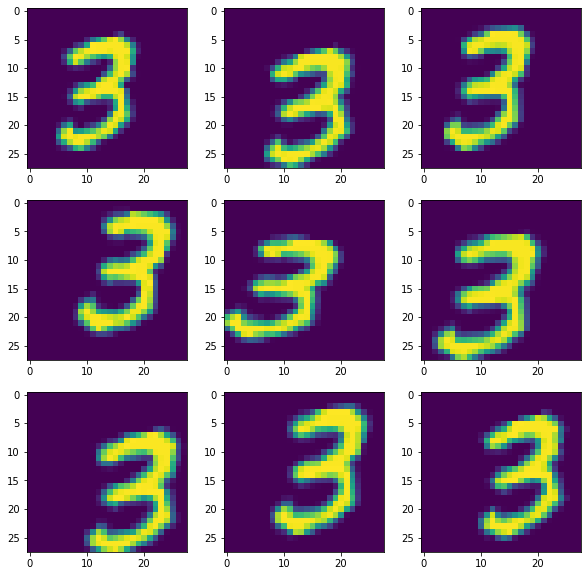

In [9]:
demo(training_set)